In [1]:
!pip install pandas numpy textblob scikit-learn xgboost keras matplotlib


import pandas, numpy, string, textblob
import pickle
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import xgboost
from keras import layers, models, optimizers
from keras.preprocessing import text, sequence
import matplotlib.pyplot as plt

DEPRECATION: Loading egg at c:\users\user\appdata\local\programs\python\python311\lib\site-packages\aniso8601-9.0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\user\appdata\local\programs\python\python311\lib\site-packages\distlib-0.3.8-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\user\appdata\local\programs\python\python311\lib\site-packages\dnspython-2.6.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\user\app

# DATASET 

In [2]:
#Load training data
df_train = pandas.read_excel('E:/Natural Language Processing/Project/ML/dataset/train_data.xlsx')
# df_train = df_train.truncate(after=10000)
#Load testing data
df_test = pandas.read_excel('E:/Natural Language Processing/Project/ML/dataset/test_data.xlsx')

In [3]:
# Display the column names of the DataFrame
print(df_train.columns)

# Display the structure of the DataFrame
print(df_train.head())

df_train.info()


Index(['doc_text', 'class'], dtype='object')
                                            doc_text       class
0  In article <1993Apr9.172945.4578@island.COM> g...     medical
1  In article <1993Apr5.184527.1@aurora.alaska.ed...       space
2  Sounds liek what the FED has to do is sign a 5...       space
3  Lib Dems' new election PR chief\n\nThe Lib Dem...    politics
4  Gallipoli Campaign\nWith World War I having ef...  historical
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   doc_text  800 non-null    object
 1   class     800 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB


In [4]:
df_train.head()
df_train.info()
df_count = df_train.groupby(['class'], as_index = False).agg({'doc_text': 'count'})
df_count.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   doc_text  800 non-null    object
 1   class     800 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB


,class,doc_text
0,business,76
1,entertainment,83
2,food,80
3,graphics,82
4,historical,78


# TEXT PREPROCESSING 

In [5]:
!pip install beautifulsoup4 nltk unidecode

import re, unidecode
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

# Needed only once
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text
def remove_accented_chars(text):
    text = unidecode.unidecode(text)
    return text
def remove_numbers(text): 
    result = re.sub(r'\d+', '', text) 
    return result
def remove_slash_with_space(text): 
    return text.replace('\\', " ")
def remove_punctuation(text): 
    translator = str.maketrans('', '', string.punctuation) 
    return text.translate(translator) 
def text_lowercase(text): 
    return text.lower()     
def remove_whitespace(text): 
    return  " ".join(text.split()) 
def remove_stopwords(text): 
    stop_words = set(stopwords.words("english")) 
    word_tokens = word_tokenize(text) 
    filtered_text = [word for word in word_tokens if word not in stop_words] 
    return ' '.join(filtered_text)
def stem_words(text): 
    stemmer = PorterStemmer() 
    word_tokens = word_tokenize(text) 
    stems = [stemmer.stem(word) for word in word_tokens] 
    return ' '.join(stems)
def lemmatize_words(text): 
    lemmatizer = WordNetLemmatizer() 
    word_tokens = word_tokenize(text) 
    # provide context i.e. part-of-speech 
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    return ' '.join(lemmas) 

DEPRECATION: Loading egg at c:\users\user\appdata\local\programs\python\python311\lib\site-packages\aniso8601-9.0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\user\appdata\local\programs\python\python311\lib\site-packages\distlib-0.3.8-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\user\appdata\local\programs\python\python311\lib\site-packages\dnspython-2.6.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\user\app

In [6]:
# Perform preprocessing
def perform_preprocessing(text):
    text = remove_html_tags(text)
    text = remove_accented_chars(text)
    text = remove_numbers(text)
    text = remove_stopwords(text)
    text = text_lowercase(text)
    text = remove_slash_with_space(text)
    text = remove_punctuation(text)
    # text = stem_words(text)
    text = lemmatize_words(text)
    text = remove_whitespace(text)
    return text

df_train['class'] = df_train['class'].apply(perform_preprocessing)
df_train['doc_text'] = df_train['doc_text'].apply(perform_preprocessing)
df_test['class'] = df_test['class'].apply(perform_preprocessing)
df_test['doc_text'] = df_test['doc_text'].apply(perform_preprocessing)

C:\Users\user\AppData\Local\Temp\ipykernel_8120\1658587471.py:17: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


# TRAIN TEST SPLIT 

In [7]:
X_train = df_train['doc_text']
X_test = df_test['doc_text']
y_train = df_train['class']
y_test = df_test['class']

# Feature Engineering 
Text files are actually series of words (ordered). In order to run machine learning algorithms we need to convert the text files into numerical feature vectors.

We will implement the following different ideas in order to obtain relevant features from our dataset.

1. CountVectors – I have used scikit-learn library’s CountVectorizer module to vectorize sentences. It generates vocabulary for all unique words of sentence. From this count of words, a feature vector is created. This essentially is the Bag of Words BOW model.

In [8]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(X_train)
X_train_count =  count_vect.transform(X_train)
X_test_count =  count_vect.transform(X_test)

2. TF-IDF Vectors Word level - Now in order to assign weightage to the above feature vector, we have used Term Frequency – Inverse Document Frequency logic. We have given a score to the words based on its Term Frequency (#words/ #Total words) and its Inverse Frequency, i.e. presence in each of the documents. It low scores repetitive words.

In [9]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(X_train)
X_train_tfidf =  tfidf_vect.transform(X_train)
X_test_tfidf =  tfidf_vect.transform(X_test)

In [10]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,2), max_features=5000)
tfidf_vect_ngram.fit(X_train)
X_train_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
X_test_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

In [11]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(X_train)
X_train_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
X_test_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test) 

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:555: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [12]:
# label encode the target variable 
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

encoder = preprocessing.LabelBinarizer()
encoder.fit(y_train)
y_train_bi = encoder.transform(y_train)
y_test_bi = encoder.transform(y_test)

MODEL SELECTION AND TRAINING

In [13]:
def train_model(classifier, X_train, y_train, X_test, y_test, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(X_train, y_train)
    # predict the labels on validation dataset
    predictions = classifier.predict(X_test)
    return metrics.accuracy_score(predictions, y_test)

NB, Count Vectors:  0.94
NB, WordLevel TF-IDF:  0.965
NB, N-Gram Vectors:  0.955
NB, CharLevel Vectors:  0.7


<BarContainer object of 4 artists>

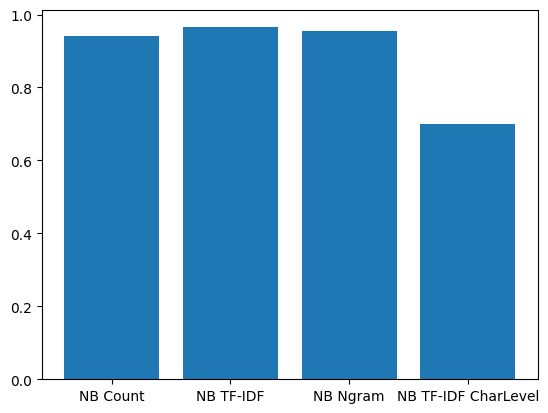

In [14]:
# Naive Bayes on Count Vectors
accuracy1 = train_model(naive_bayes.MultinomialNB(), X_train_count, y_train, X_test_count, y_test)
print("NB, Count Vectors: ", accuracy1)

# Naive Bayes on Word Level TF IDF Vectors
accuracy2 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("NB, WordLevel TF-IDF: ", accuracy2)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy3 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram, y_test)
print("NB, N-Gram Vectors: ", accuracy3)

# Naive Bayes on Character Level TF IDF Vectors
accuracy4 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars, y_test)
print("NB, CharLevel Vectors: ", accuracy4)

df = {'ModelType': ['NB Count', 'NB TF-IDF','NB Ngram', 'NB TF-IDF CharLevel' ], 'Accuracy': [accuracy1,accuracy2, accuracy3,accuracy4]}
df = pandas.DataFrame(df) #
plt.bar(df['ModelType'], df['Accuracy'])

LR, Count Vectors:  0.945
LR, WordLevel TF-IDF:  0.96
LR, N-Gram Vectors:  0.965
LR, CharLevel Vectors:  0.93


<BarContainer object of 4 artists>

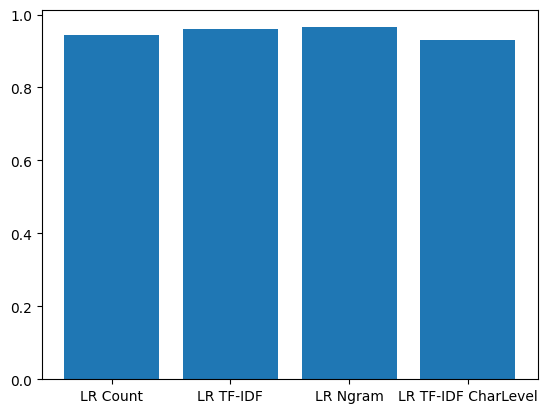

In [15]:
# Logistic Regression on Count Vectors
accuracy1 = train_model(linear_model.LogisticRegression(), X_train_count, y_train, X_test_count, y_test)
print("LR, Count Vectors: ", accuracy1)

# Logistic Regression on Word Level TF IDF Vectors
accuracy2 = train_model(linear_model.LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR, WordLevel TF-IDF: ", accuracy2)

# Logistic Regression on Ngram Level TF IDF Vectors
accuracy3 = train_model(linear_model.LogisticRegression(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram, y_test)
print("LR, N-Gram Vectors: ", accuracy3)

# Logistic Regression on Character Level TF IDF Vectors
accuracy4 = train_model(linear_model.LogisticRegression(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars, y_test)
print("LR, CharLevel Vectors: ", accuracy4)

df = {'ModelType': ['LR Count', 'LR TF-IDF','LR Ngram', 'LR TF-IDF CharLevel' ], 'Accuracy': [accuracy1,accuracy2, accuracy3,accuracy4]}
df = pandas.DataFrame(df) #
plt.bar(df['ModelType'], df['Accuracy'])

RF, Count Vectors:  0.945
RF, WordLevel TF-IDF:  0.92


<BarContainer object of 4 artists>

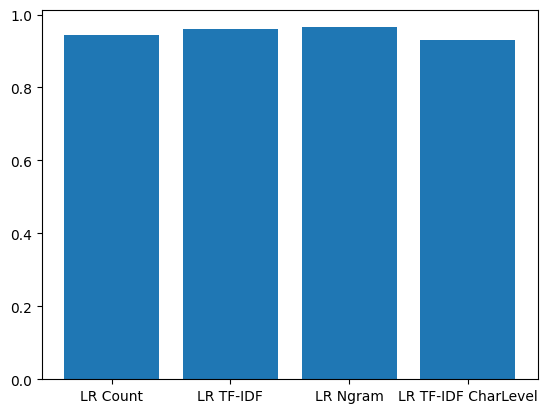

In [17]:
# RF on Count Vectors
accuracy1 = train_model(ensemble.RandomForestClassifier(), X_train_count, y_train, X_test_count, y_test)
print("RF, Count Vectors: ", accuracy1)

# RF on Word Level TF IDF Vectors
accuracy2 = train_model(ensemble.RandomForestClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("RF, WordLevel TF-IDF: ", accuracy2)
plt.bar(df['ModelType'], df['Accuracy'])

Xgb, Count Vectors:  0.86
Xgb, WordLevel TF-IDF:  0.93


<BarContainer object of 4 artists>

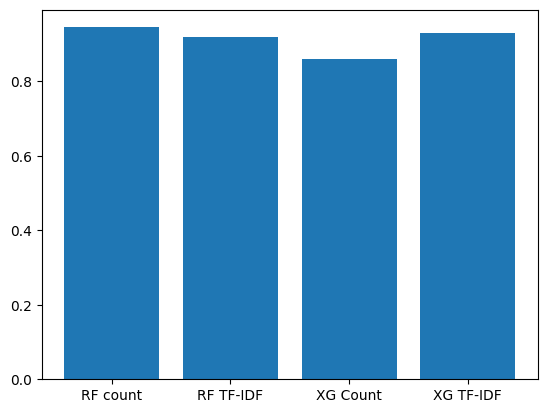

In [19]:
# Extereme Gradient Boosting (XG boost) on Count Vectors
accuracy3 = train_model(xgboost.XGBClassifier(), X_train_count.tocsc(), y_train, X_test_count.tocsc(), y_test)
print("Xgb, Count Vectors: ", accuracy3)

# Extereme Gradient Boosting on Word Level TF IDF Vectors
accurac4 = train_model(xgboost.XGBClassifier(), X_train_tfidf.tocsc(), y_train, X_test_tfidf.tocsc(), y_test)
print("Xgb, WordLevel TF-IDF: ", accuracy4)

# # Extereme Gradient Boosting on Character Level TF IDF Vectors
# accuracy = train_model(xgboost.XGBClassifier(), X_train_tfidf_ngram_chars.tocsc(), y_train, X_test_tfidf_ngram_chars.tocsc(), y_test)
# print("Xgb, CharLevel Vectors: ", accuracy)
df = {'ModelType': ['RF count', 'RF TF-IDF','XG Count', 'XG TF-IDF' ], 'Accuracy': [accuracy1,accuracy2, accuracy3,accuracy4]}
df = pandas.DataFrame(df) #
plt.bar(df['ModelType'], df['Accuracy'])

PARAMETERS

In [20]:
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2560512   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 2,565,642
Trainable params: 2,565,642
Non-trainable params: 0
_________________________________________________________________
<class 'scipy.sparse._csr.csr_matrix'>
<class 'numpy.ndarray'>
5000
Epoch 1/25
8/8 [==============================] - 2s 103ms/step - loss: 2.2343 - accuracy: 0.6333 - val_loss: 

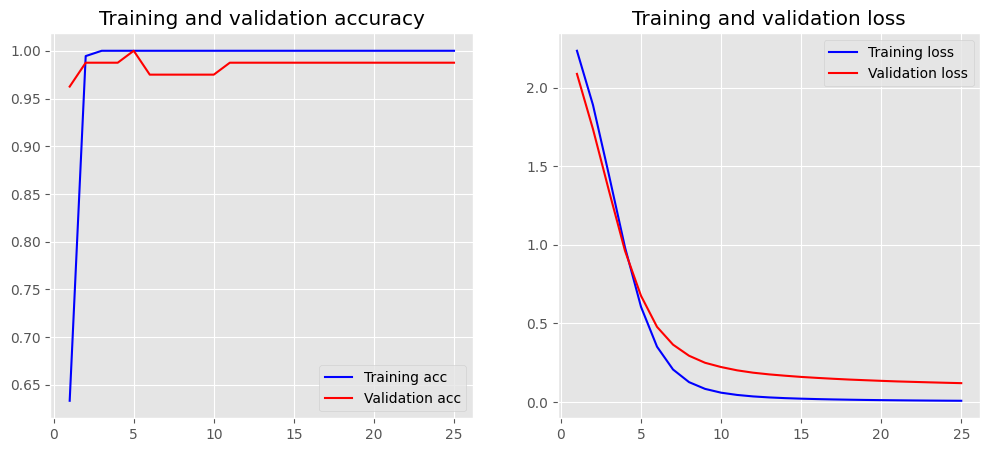

In [21]:
vocab_size = X_train_tfidf.shape[1]
num_labels = 4
batch_size = 100
# Neural network on TFIDF
model = models.Sequential()
model.add(layers.Dense(512, input_shape=(vocab_size,)))
model.add(layers.Activation('relu'))
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))
model.summary()
 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
print(type(X_train_tfidf))

print(type(y_train_bi))

print(vocab_size)

history = model.fit(X_train_tfidf.toarray(), y_train_bi,
                    batch_size=batch_size,
                    epochs=25,
                    validation_split=0.1,
                    verbose=1)

loss, accuracy = model.evaluate(X_train_tfidf.toarray(), y_train_bi, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_tfidf.toarray(), y_test_bi, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(history)

In [22]:
vocab_size = 15000
num_labels = 4
batch_size = 100
maxlen = 200

print(X_train)

tokenizer = text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)

X_train_token = tokenizer.texts_to_sequences(X_train)
X_test_token = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding again 1 because of reserved 0 index

X_train_token = sequence.pad_sequences(X_train_token, padding='post', maxlen=maxlen)
X_test_token = sequence.pad_sequences(X_test_token, padding='post', maxlen=maxlen)
embedding_dim = 300

0      in article apr islandcom green islandcom rober...
1      in article apr auroraalaskaedu nsmca auroraala...
2      sound liek feed sign year lease use certain pa...
3      lib dems new election pr chief the lib dems ap...
4      gallipoli campaign with world war i effectivel...
                             ...                        
795    mp attack muggers kenya an mp ps passport stea...
796    european medal chance improve what european in...
797    radcliffe yet answer gb call paula radcliffe g...
798    abbas will tolerate attack palestinian leader ...
799    iaaf await greek pair s response kostas kenter...
Name: doc_text, Length: 800, dtype: object


Word Embeddings (It has been found to work well with neural networks)
In this I have sought to represent words in the form of vectors. It preserves contextually similar words and reduces the high dimensional word features to low dimensional feature vectors. Deep learning model namely RNN and CNN use it in their algorithm. I have used GIoVe to create word embedding of a text. The module of Word2Vec has a preprocessing module, a continuous bag of words and skip-grams. The latter two features are essentially shallow neural networks.

Using Pretrained Word Embeddings

In [23]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    embedding_matrix = numpy.zeros((vocab_size, embedding_dim))

    with open(filepath,'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = numpy.array(
                    vector, dtype=numpy.float32)[:embedding_dim]

    return embedding_matrix

#basic new word embed
embedding_matrix = create_embedding_matrix('E:/Natural Language Processing/Project/ML/dataset/glove.6B/glove.6B.300d.txt',tokenizer.word_index, embedding_dim)
nonzero_elements = numpy.count_nonzero(numpy.count_nonzero(embedding_matrix, axis=1))
print(nonzero_elements / vocab_size)

0.8442976156276932


In [24]:
# Shallow neural network basic with word embedding matrix
embedding_dim = 300

model = models.Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim,
                           weights=[embedding_matrix],
                           input_length=maxlen,
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(512, input_shape=(vocab_size,)))
model.add(layers.Activation('relu'))
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))
# model.summary()
 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(X_train_token, y_train_bi,
                    batch_size=batch_size,
                    epochs=25,
                    validation_split=0.1,
                    verbose=1)

loss, accuracy = model.evaluate(X_train_token, y_train_bi, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_token, y_test_bi, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/25
8/8 [==============================] - 3s 206ms/step - loss: 2.4471 - accuracy: 0.1278 - val_loss: 2.3246 - val_accuracy: 0.1750
Epoch 2/25
8/8 [==============================] - 2s 199ms/step - loss: 2.1760 - accuracy: 0.2125 - val_loss: 2.0368 - val_accuracy: 0.3375
Epoch 3/25
8/8 [==============================] - 1s 171ms/step - loss: 1.9959 - accuracy: 0.4097 - val_loss: 1.9887 - val_accuracy: 0.4125
Epoch 4/25
8/8 [==============================] - 1s 166ms/step - loss: 1.8287 - accuracy: 0.5736 - val_loss: 1.8235 - val_accuracy: 0.5000
Epoch 5/25
8/8 [==============================] - 1s 173ms/step - loss: 1.7217 - accuracy: 0.5597 - val_loss: 1.6547 - val_accuracy: 0.7125
Epoch 6/25
8/8 [==============================] - 1s 184ms/step - loss: 1.6071 - accuracy: 0.6625 - val_loss: 1.8083 - val_accuracy: 0.2125
Epoch 7/25
8/8 [==============================] - 1s 158ms/step - loss: 1.4857 - accuracy: 0.5972 - val_loss: 1.4923 - val_accuracy: 0.5500
Epoch 8/25
8/8 [====

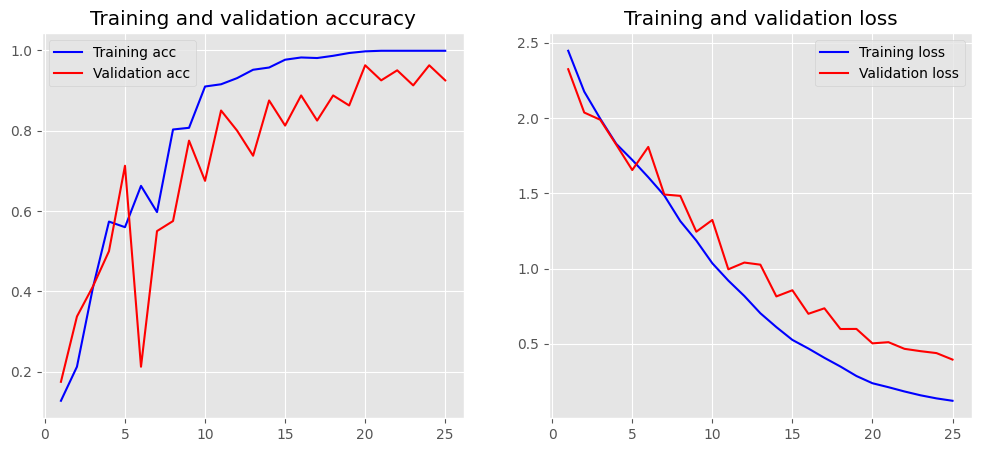

In [25]:
plot_history(history)

# CNN

In [26]:
# Deep Neural networks CNN
model = models.Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim,
                           weights=[embedding_matrix],
                           input_length=maxlen,
                           trainable=True))
model.add(layers.SpatialDropout1D(0.3))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(256))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))
model.summary()
 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(X_train_token, y_train_bi,
                    batch_size=30,
                    epochs=25,
                    validation_split=0.1,
                    verbose=1)

loss, accuracy = model.evaluate(X_train_token, y_train_bi, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_token, y_test_bi, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 300)          6265800   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 300)         0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 196, 128)          192128    
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 activation_4 (Activation)   (None, 256)              

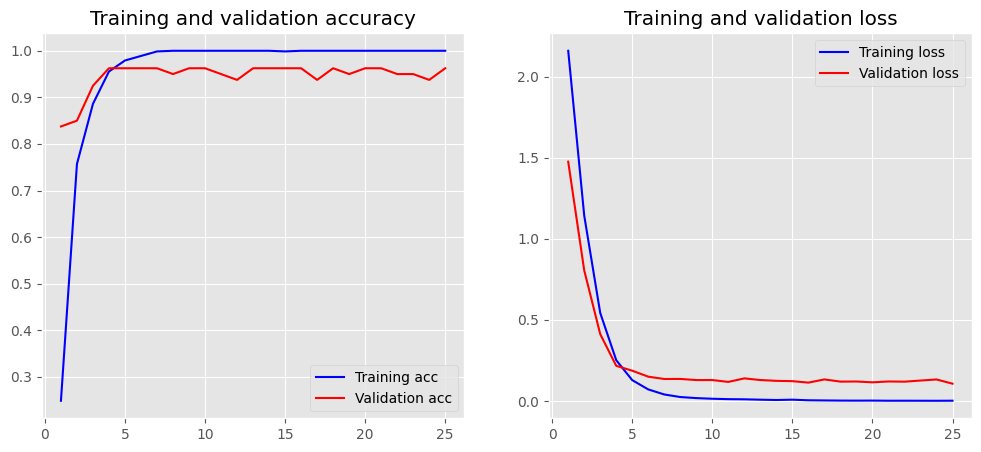

In [27]:
plot_history(history)

SAVE MODEL

In [28]:
# creates a HDF5 file 'my_model.h5'
model.save('E:/Natural Language Processing/Project/ML/NLP_model.h5')

# Save Tokenizer i.e. Vocabulary
with open('E:/Natural Language Processing/Project/ML/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


OPTIONAL

Recurrent Neural Network Bidirectional GRU

In [29]:
# Bi directional rnn gru

model = models.Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim,
                           weights=[embedding_matrix],
                           input_length=maxlen,
                           trainable=True))
model.add(layers.SpatialDropout1D(0.3))
model.add(layers.Bidirectional(layers.GRU(100)))
model.add(layers.Dense(512, input_shape=(vocab_size,)))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))
# model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train_token, y_train_bi,
                    batch_size=batch_size,
                    epochs=25,
                    validation_split=0.1,
                    verbose=1)

loss, accuracy = model.evaluate(X_train_token, y_train_bi, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_token, y_test_bi, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/25
8/8 [==============================] - 32s 3s/step - loss: 2.2043 - accuracy: 0.2292 - val_loss: 1.9760 - val_accuracy: 0.5125
Epoch 2/25
8/8 [==============================] - 25s 3s/step - loss: 1.8708 - accuracy: 0.5319 - val_loss: 1.6387 - val_accuracy: 0.6250
Epoch 3/25
8/8 [==============================] - 29s 4s/step - loss: 1.4844 - accuracy: 0.6250 - val_loss: 1.2696 - val_accuracy: 0.6875
Epoch 4/25
8/8 [==============================] - 30s 4s/step - loss: 1.1204 - accuracy: 0.6569 - val_loss: 0.9809 - val_accuracy: 0.7000
Epoch 5/25
8/8 [==============================] - 27s 3s/step - loss: 0.7954 - accuracy: 0.7569 - val_loss: 0.7706 - val_accuracy: 0.7125
Epoch 6/25
8/8 [==============================] - 26s 3s/step - loss: 0.5546 - accuracy: 0.8181 - val_loss: 0.6434 - val_accuracy: 0.8000
Epoch 7/25
8/8 [==============================] - 22s 3s/step - loss: 0.3778 - accuracy: 0.8667 - val_loss: 0.4457 - val_accuracy: 0.8250
Epoch 8/25
8/8 [==================

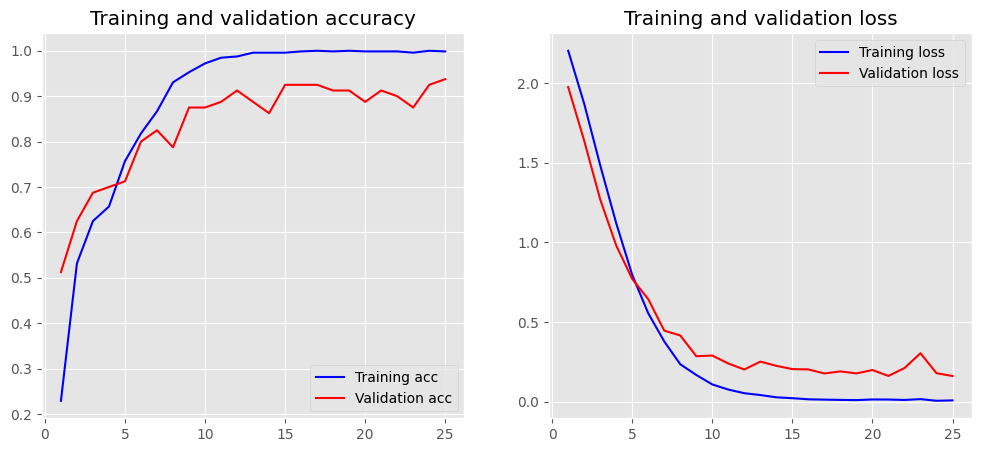

In [30]:
plot_history(history)

RESULT AND TESTING

In [122]:
final_model = models.load_model('E:/Natural Language Processing/Project/ML/NLP_model.h5')
 
# load tokenizer
tokenizer = text.Tokenizer()
with open('E:/Natural Language Processing/Project/ML/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [123]:
df_count.head(10)

,class,doc_text
0,business,76
1,entertainment,83
2,food,80
3,graphics,82
4,historical,78
5,medical,78
6,politics,84
7,space,73
8,sport,77
9,technologies,89


In [125]:
class_dict = {'0': 'business', '1': 'entertainment','2': 'food','3': 'graphics', '4': 'historical', '5': 'medical', '6': 'politics', '7': 'space', '8': 'sport', '9':'technologies'}
inp = ["QR codes at San Antonio bus stops change the game for visually impaired commuters. Bus stops across San Antonio are getting easily detectible QR codes to help visually impaired commuters better navigate the city."]
inp = [perform_preprocessing(x) for x in inp]
inp_token = tokenizer.texts_to_sequences(inp)
inp_token = sequence.pad_sequences(inp_token, padding='post', maxlen=maxlen)

out = final_model.predict(inp_token)
predicted_label = numpy.argmax(out) 
print("Predicted label: " + class_dict.get(str(predicted_label)))

1/1 [==============================] - 0s 81ms/step
Predicted label: technologies
